# 데이콘 이상탐지 데이터 분석
---

In [1]:
!pip install --upgrade matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\leonk\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


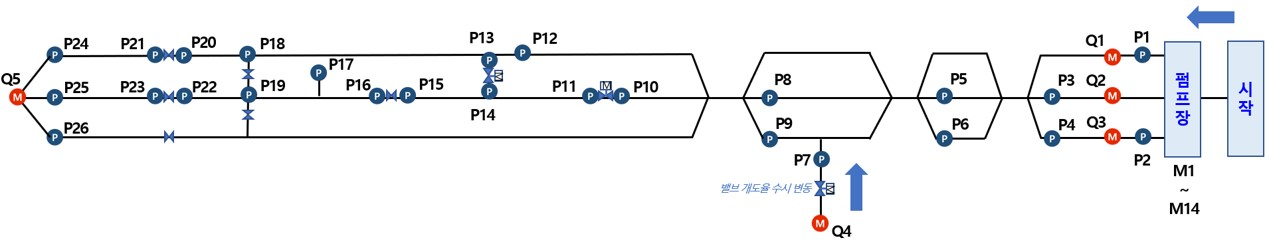

In [ ]:
#밸브 개도율 압력계: p7, p10,p11,p13,p14,p15,p16,p18,p19,p20,p21,p22,p23

# M7펌프가 24/06/26 05:58 1에서 0으로 변함
# 압력계가 비정상이되면 14:20-부터 급격히 떨어지다가 정상화된 14:50부터 다시 올라감
- P가 anomaly 관측에 주요 변수로 보임(P8)
- 밸브 개도율 수시 변동과 p8 p9 사이 상관관계 가능
- Q4는 굉장히 중요한 변수다
- Q5가 완전 음에서 완전 양으로 바뀐다
- p7하고 q4가 상관관계 -1에 가까워 q4와 p7사이에 밸브는 개도율이 수시로 변동한다 
- p7이 압력이 높아졌을 때 밸브를 닫아서 q4의 유량이 감소했을 가능성이 있음
- 베르누이 원리에 의해서 정상상태에서는 유량과 압력이 음의 상관관계다
- 근데 anomaly상황에서 q5에서 양의 상관관계다
Anomaly 상황에서 유량과 압력이 양의 상관관계를 보이는 것은 시스템에 비정상적인 상태가 발생했음을 시사합니다. 이는 다음과 같은 상황을 나타낼 수 있습니다:
누수 발생: 파이프라인에 누수가 발생하면, 압력이 증가함에 따라 누수 지점을 통한 유량도 증가할 수 있습니다2. 이는 정상적인 흐름과는 다른 패턴을 보이게 됩니다.
막힘 현상: 파이프라인에 부분적인 막힘이 발생하면, 압력이 증가하면서 동시에 유량도 증가할 수 있습니다. 이는 막힘을 통과하기 위해 더 높은 압력이 필요하기 때문입니다2.
펌프 오작동: 시스템 내 펌프가 비정상적으로 작동하면, 압력과 유량이 동시에 증가하는 현상이 나타날 수 있습니다3.
밸브 오작동: 제어 밸브가 제대로 작동하지 않으면, 압력과 유량 사이의 정상적인 관계가 무너질 수 있습니다.
결론
이러한 관찰 결과는 시스템의 정상 상태와 비정상 상태를 구분하는 중요한 지표가 될 수 있습니다4. 유량과 압력 사이의 관계가 갑자기 변화하는 것은 시스템에 문제가 발생했음을 나타내는 신호일 수 있으며, 이를 통해 조기에 문제를 감지하고 대응할 수 있습니다. 따라서 이러한 패턴 변화를 모니터링하는 것은 수도 공급 시스템의 효율적인 관리와 유지보수에 매우 중요합니다5.

# 데이터 정보

In [41]:
df_A = pd.read_csv("TRAIN_A.csv")

print(df_A.columns)
print("칼럼 수 : ",len(df_A.columns))
print("차원 : ",df_A.shape)


# 새로운 열 생성: Q5 - (Q1 + Q2 + Q3 + Q4)
df_A['leakage'] = df_A['Q1'] + df_A['Q2'] + df_A['Q3'] + df_A['Q4'] - df_A['Q5']

Index(['timestamp', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'M1', 'M2', 'M3', 'M4', 'M5',
       'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'P1', 'P2',
       'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13',
       'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23',
       'P24', 'P25', 'P26', 'anomaly', 'P1_flag', 'P2_flag', 'P3_flag',
       'P4_flag', 'P5_flag', 'P6_flag', 'P7_flag', 'P8_flag', 'P9_flag',
       'P10_flag', 'P11_flag', 'P12_flag', 'P13_flag', 'P14_flag', 'P15_flag',
       'P16_flag', 'P17_flag', 'P18_flag', 'P19_flag', 'P20_flag', 'P21_flag',
       'P22_flag', 'P23_flag', 'P24_flag', 'P25_flag', 'P26_flag'],
      dtype='object')
칼럼 수 :  73
차원 :  (44101, 73)
      Q1         Q2         Q3    Q4     Q5   leakage
0  17880  37151.001  24834.001  6321  85828   358.002
1  17970  37069.001  25016.001  6367  85212  1210.002
2  17280  37345.000  24462.000  6431  85655  -137.000
3  17280  37345.000  24462.000  6431  85619  -101.

In [42]:
# 결과 확인 (처음 5행 출력)
print(df_A[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'leakage']].head())

      Q1         Q2         Q3    Q4     Q5   leakage
0  17880  37151.001  24834.001  6321  85828   358.002
1  17970  37069.001  25016.001  6367  85212  1210.002
2  17280  37345.000  24462.000  6431  85655  -137.000
3  17280  37345.000  24462.000  6431  85619  -101.000
4  17920  37075.000  24896.001  6206  85619   478.001


`-` 해결해야할 문제 : P 압력계에서 일어나는 이상치를 탐지

- Q1 ~ Q5 : 유량 정량 정보
- M1 ~ M14 : 이진 분류되어진 펌프가동정보, 이산형 데이터 0이면 꺼진거 1이면 켜진거
- P1 ~ P26 : 해당 펌프의 상수도의 압력계 정량 정보 0이면 정상 1이면 이상치!!
- P1_flag ~ P26_flag : 어떠한 P에 이상 탐지 여부, 이진 분류, test set에선 제공되지 않는다
- anomaly : 이상 탐지 여부, train set에서만 존재, P1_flag ~ P26_flag에서 감지되면 해당 변수에서도 체크된다, test set에선 제공되지 않는다
- Data set : $ D_{train} \in R^{n \times m} $ , $n = 1,2,...,44101,\quad m = 1,2,...,73$
- $n$단위는 1분, 결측치 존재 X


---
# EDA 
- 이상탐지여부 중심으로 진행
- 매우 낮은 이상치 갯수 

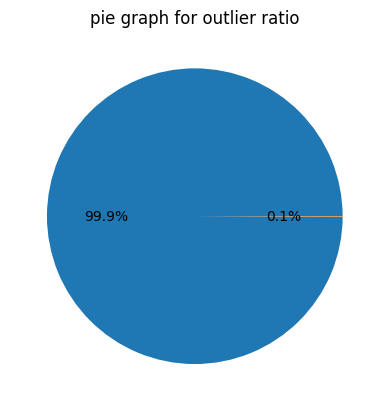

In [43]:
plt.pie(df_A[["anomaly"]].value_counts(),autopct='%1.1f%%')
plt.title("pie graph for outlier ratio")
plt.show()

In [44]:
df_true = df_A[df_A["anomaly"] == 1].iloc[:,1:(5+14+26+1)]
df_false = df_A[df_A["anomaly"] != 1].iloc[:,1:(5+14+26+1)]

## Q1~Q5 박스플랏
- 시계열 데이터를 박스플랏으로 보기는 조금 난해하지만 이상치가 표본으로부터 얼마나 거리가 떨어져있는지 확인하기 위해 박스플랏을 그려보았다
- Q3는 다른 데이터에 비해 분포가 매우 큰 차이가 날 것으로 보인다.

C:\Users\leonk\AppData\Local\Temp\ipykernel_23660\3374142136.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[row, col].boxplot(
C:\Users\leonk\AppData\Local\Temp\ipykernel_23660\3374142136.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[row, col].boxplot(
C:\Users\leonk\AppData\Local\Temp\ipykernel_23660\3374142136.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[row, col].boxplot(
C:\Users\leonk\AppData\Local\Temp\ipykernel_23660\3374142136.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will 

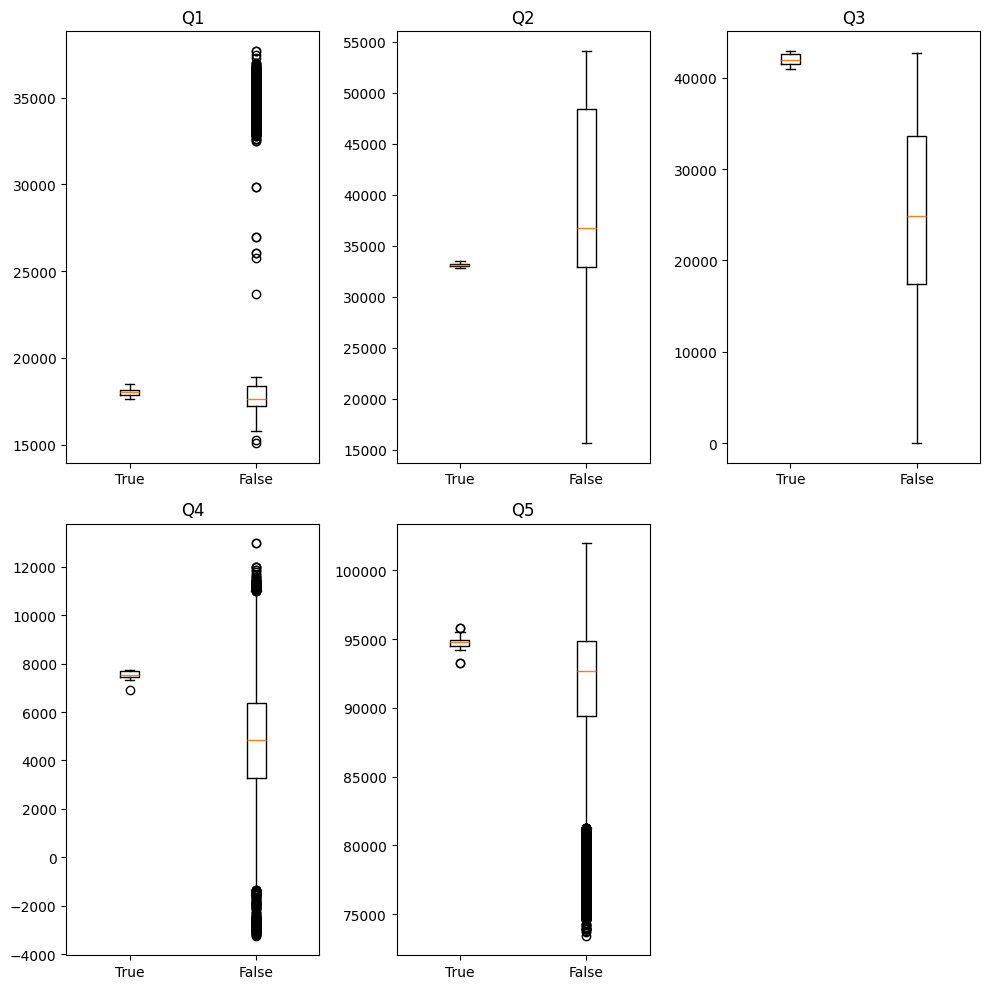

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(10, 10))

titles = ["Q1", "Q2", "Q3", "Q4", "Q5"]
data = [df_true.iloc[:, i].values for i in range(5)]
labels = ["True", "False"]

for i in range(5):
    row, col = divmod(i, 3)  # 2x3 배열에서 행(row)과 열(col) 계산
    ax[row, col].boxplot(
        [data[i], df_false.iloc[:, i].values], 
        labels=labels
    )
    ax[row, col].set_title(titles[i])

# 필요 없는 격자 숨기기 (마지막 서브플롯)
ax[1, 2].axis("off")


plt.tight_layout()  # 레이아웃 조정
plt.show()

## Q1~Q5 시도표
- 그래프를 통해, 시계열 추세가 매우 변동이 큰 것을 보아 포인트를 찾는 이상치 기법보단 구간별로 이상치를 찾아야할 것으로 보인다.

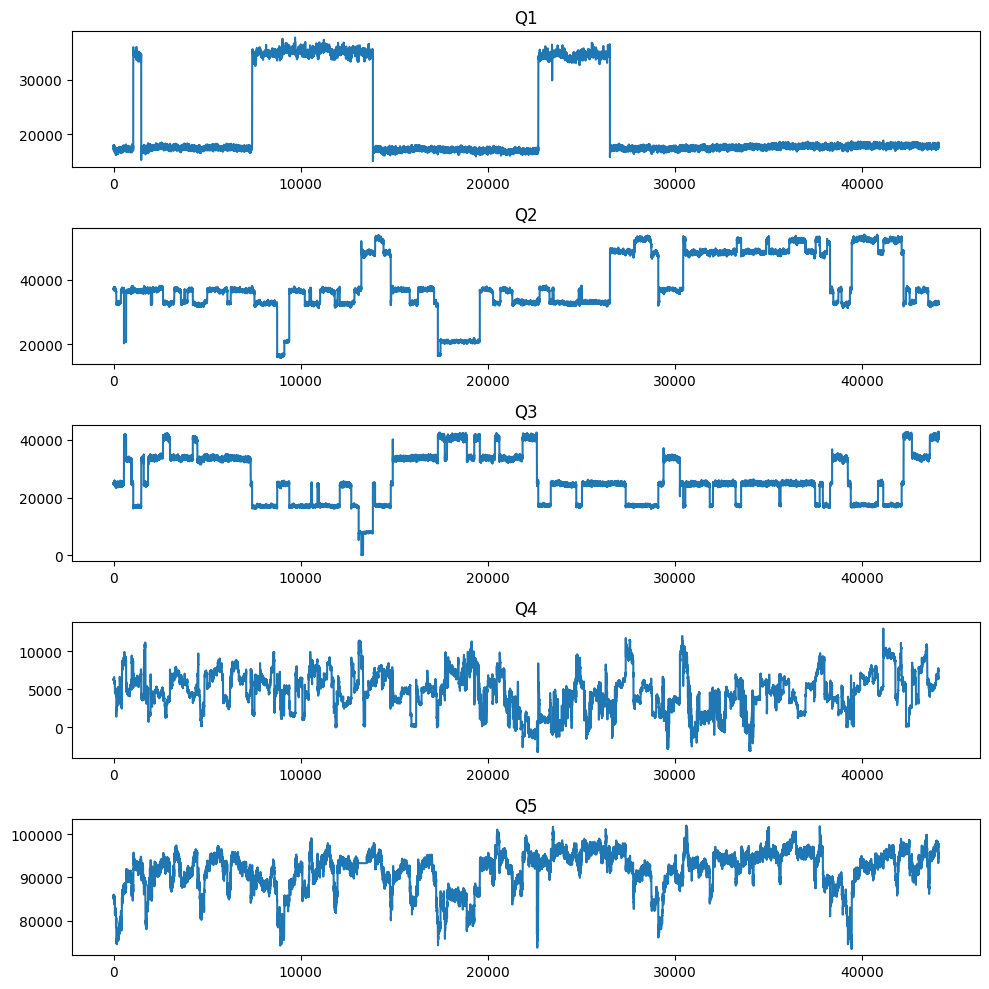

In [46]:
fig, ax = plt.subplots(5,1,figsize=(10,10))
for i in range(0,5):
    ax[i].plot(df_A[f'Q{i+1}'])
    ax[i].set_title(titles[i])

plt.tight_layout()
plt.show()

## 이상치 구간 시각화

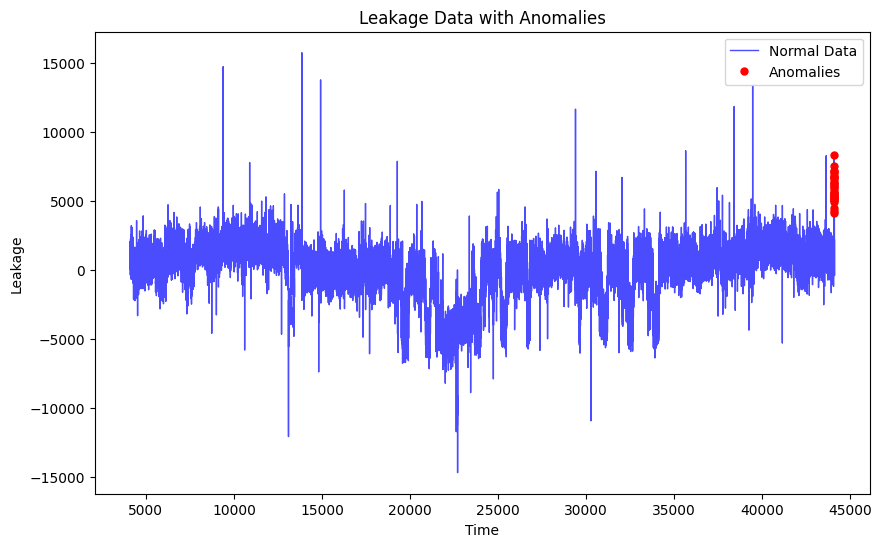

In [47]:
# 그래프 생성
fig, ax = plt.subplots(figsize=(10, 6))

# 정상 데이터 플롯
ax.plot(
    df_A.index[-40000:],  # 시간 축
    df_A['leakage'][-40000:],  # leakage 데이터
    label="Normal Data",
    color="blue",
    linewidth=1,
    alpha=0.7
)

# 이상치 데이터 플롯
ax.plot(
    df_A.index[df_A["anomaly"] == 1],  # 이상치의 시간
    df_A['leakage'][df_A["anomaly"] == 1],  # 이상치의 leakage 값
    label="Anomalies",
    color="red",
    marker='o',
    linestyle='None',
    markersize=5
)

# 그래프 설정
ax.set_title('Leakage Data with Anomalies')
ax.set_xlabel('Time')
ax.set_ylabel('Leakage')
ax.legend()

plt.show()

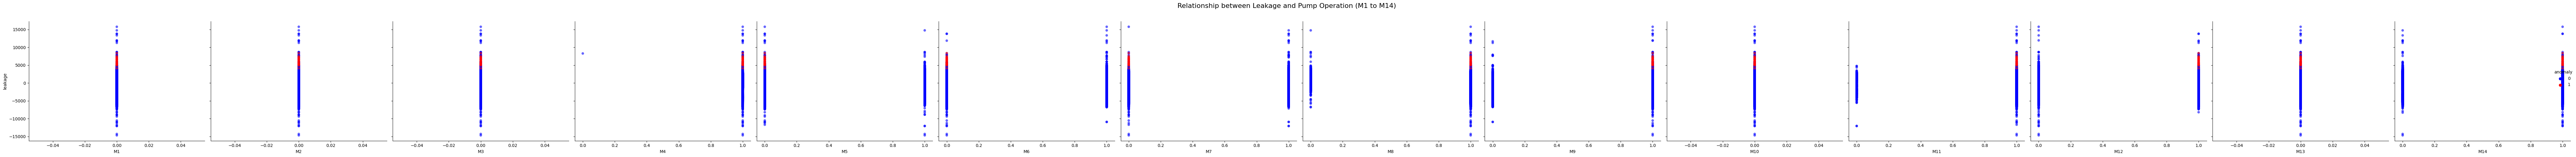

In [63]:
# Select pump operation data (M1 to M14) and leakage
data_pump = df_A[['leakage', 'anomaly'] + [f'M{i}' for i in range(1, 15)]]

# Create a custom palette
palette = {0: 'blue', 1: 'red'}

# Create a pairplot to visualize relationships between leakage and pump operation
g = sns.pairplot(data_pump, y_vars=['leakage'], x_vars=[f'M{i}' for i in range(1, 15)],
                 kind='scatter', height=5, aspect=1.2,
                 plot_kws={'alpha': 0.6, 'edgecolor': 'none'},
                 hue='anomaly', palette=palette)

# Adjust the layout and title
g.fig.suptitle('Relationship between Leakage and Pump Operation (M1 to M14)', y=1.02, fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

1. M1-0 
2. M2-0
3. M3-0
4. M4-대부분1 anomaly
5. M5-0,1반반 0일때 anomaly
6. M6-0,1 반반 0일 때 anomaly
7. M7- 0,1 반반 0일 때 anomaly
8. M8- 0,1 중 1이 조금더 많음, 1일때 anomaly
9. M9-0,1 중 1이 조금 더 많음, 1일 때 anomaly
10. M10- 0
11. M11-0,1 중 1이 조금 더 많음, 1일 때 anomaly
12. M12-0,1 중 0이 조금 더 많음, 1일 때 anomaly
13. M13-0
14. M14 반반 1일때 anomaly 

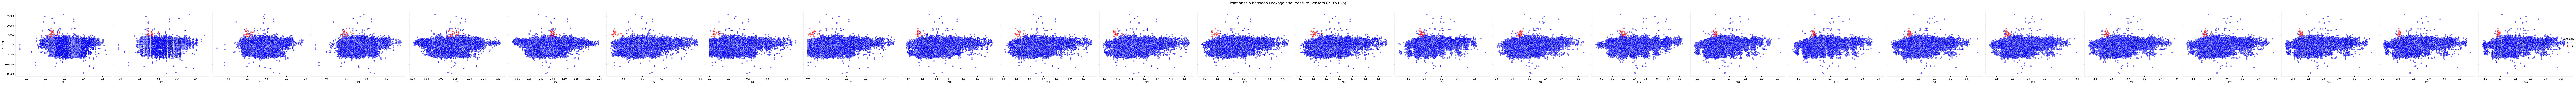

In [62]:
# Select pressure sensor data (P1 to P26), leakage, and anomaly
data_pressure = df_A[['leakage', 'anomaly'] + [f'P{i}' for i in range(1, 27)]]

# Create a pairplot for pressure sensors vs leakage with anomaly highlighting
palette = {0: 'blue', 1: 'red'}  # Normal data in blue, anomalies in red
g = sns.pairplot(
    data_pressure,
    y_vars=['leakage'],
    x_vars=[f'P{i}' for i in range(1, 27)],
    hue='anomaly',
    palette=palette,
    kind='scatter',
    height=5,
    aspect=1.2,
    plot_kws={'alpha': 0.6}
)

# Adjust the layout and title
g.fig.suptitle('Relationship between Leakage and Pressure Sensors (P1 to P26)', y=1.02, fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()
#p_flag에 대한 인사이트 보인다. p7,8,9에서 확실히

C:\Users\leonk\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


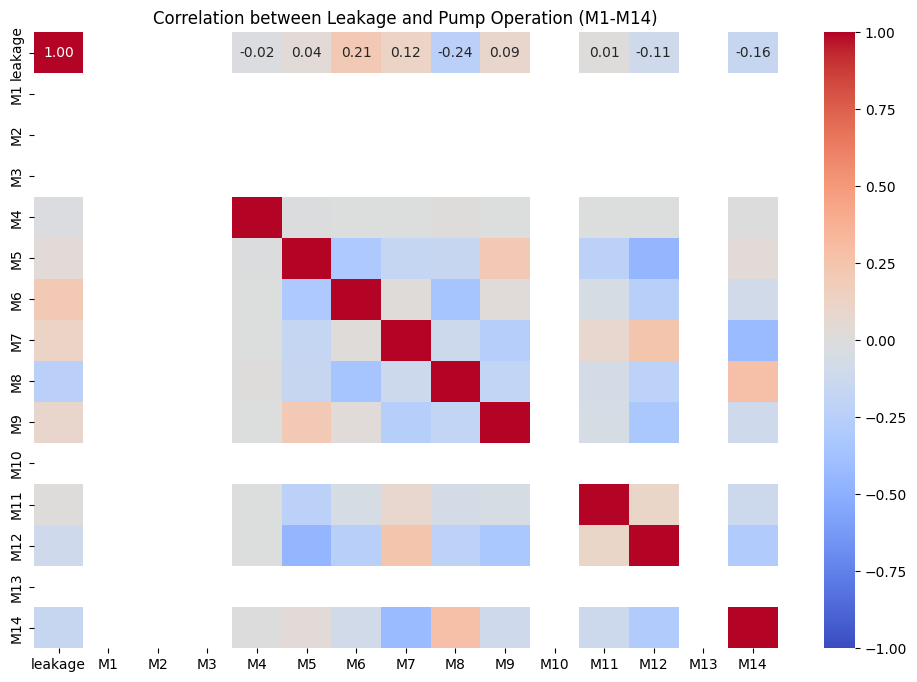

In [57]:
# 펌프 가동 여부(M1~M14)와 누수 데이터 상관관계 히트맵
plt.figure(figsize=(12, 8))
pump_corr = df_A[['leakage'] + [f'M{i}' for i in range(1, 15)]].corr()
sns.heatmap(pump_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation between Leakage and Pump Operation (M1-M14)')
plt.show()

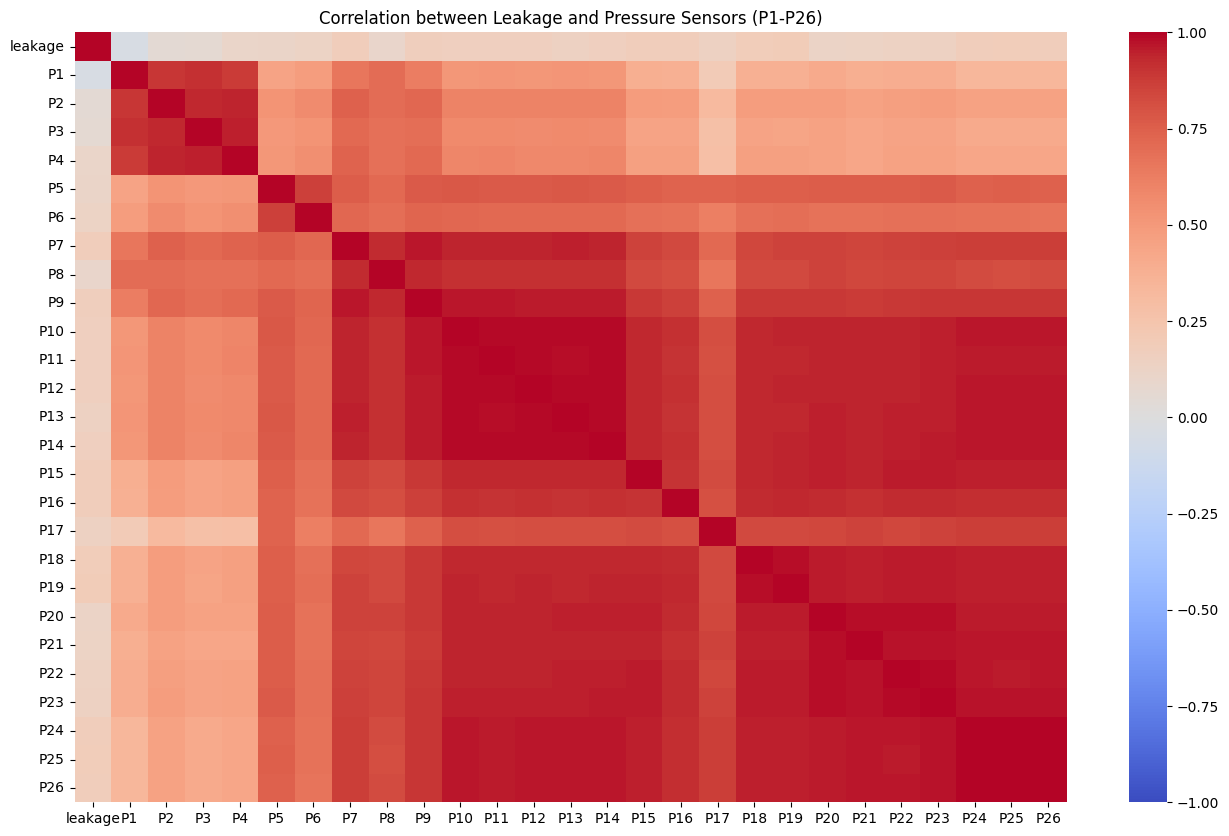

In [58]:
# 압력 센서 데이터(P1~P26)와 누수 데이터 상관관계 히트맵
plt.figure(figsize=(16, 10))
pressure_corr = df_A[['leakage'] + [f'P{i}' for i in range(1, 27)]].corr()
sns.heatmap(pressure_corr, annot=False, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation between Leakage and Pressure Sensors (P1-P26)')
plt.show()

## M1~M14
- 아래 표는 이상치 여부가 1인 데이터의 M1~M14를 합산하여 평균낸 것으로 이상치가 탐지된 구간에서 비율이 1인 것을 알 수 있다.
  - 이는 TRAIN_A 데이터에서 이상치는 M4, M8, M9, M11, M12, M14이 무조건 1로 체크되어있다는 의미이다.
- 하지만 이상치여부가 0인 데이터는 이상치와는 다르게 집계된 것을 확인할 수 있다.

In [9]:
pd.DataFrame({'anomaly':np.sum(df_true.iloc[:,5:(5+14)],axis=0) / 30,
              'No anomaly':np.sum(df_false.iloc[:,5:(5+14)],axis=0) / len(df_false)})#,np.sum(df_false.iloc[:,5:(5+14)],axis=0)

anomaly  No anomaly
M1       0.0    0.000000
M2       0.0    0.000000
M3       0.0    0.000000
M4       1.0    0.999977
M5       0.0    0.243153
M6       0.0    0.619863
M7       0.0    0.496245
M8       1.0    0.769758
M9       1.0    0.877584
M10      0.0    0.000000
M11      1.0    0.982755
M12      1.0    0.392412
M13      0.0    0.000000
M14      1.0    0.432212

## P1 ~ P26 시도표
- 관망구조를 보면 P1부터 P26은 하나의 구조로 이루어져 있는 것을 확인하였다.
- 이는 서로 집계되는 압력이 어느정도 상관관계가 있을 것으로 보이며, 다변량 문제로 접근해봐야 한다는 의미로도 볼 수 있다.
- 시도표에서도 추세, 계절 성분으로 보이는 것들이 근접한 P 사이에서 대체적으로 비슷하게 나타나 있는 것을 확인할 수 있었다. 

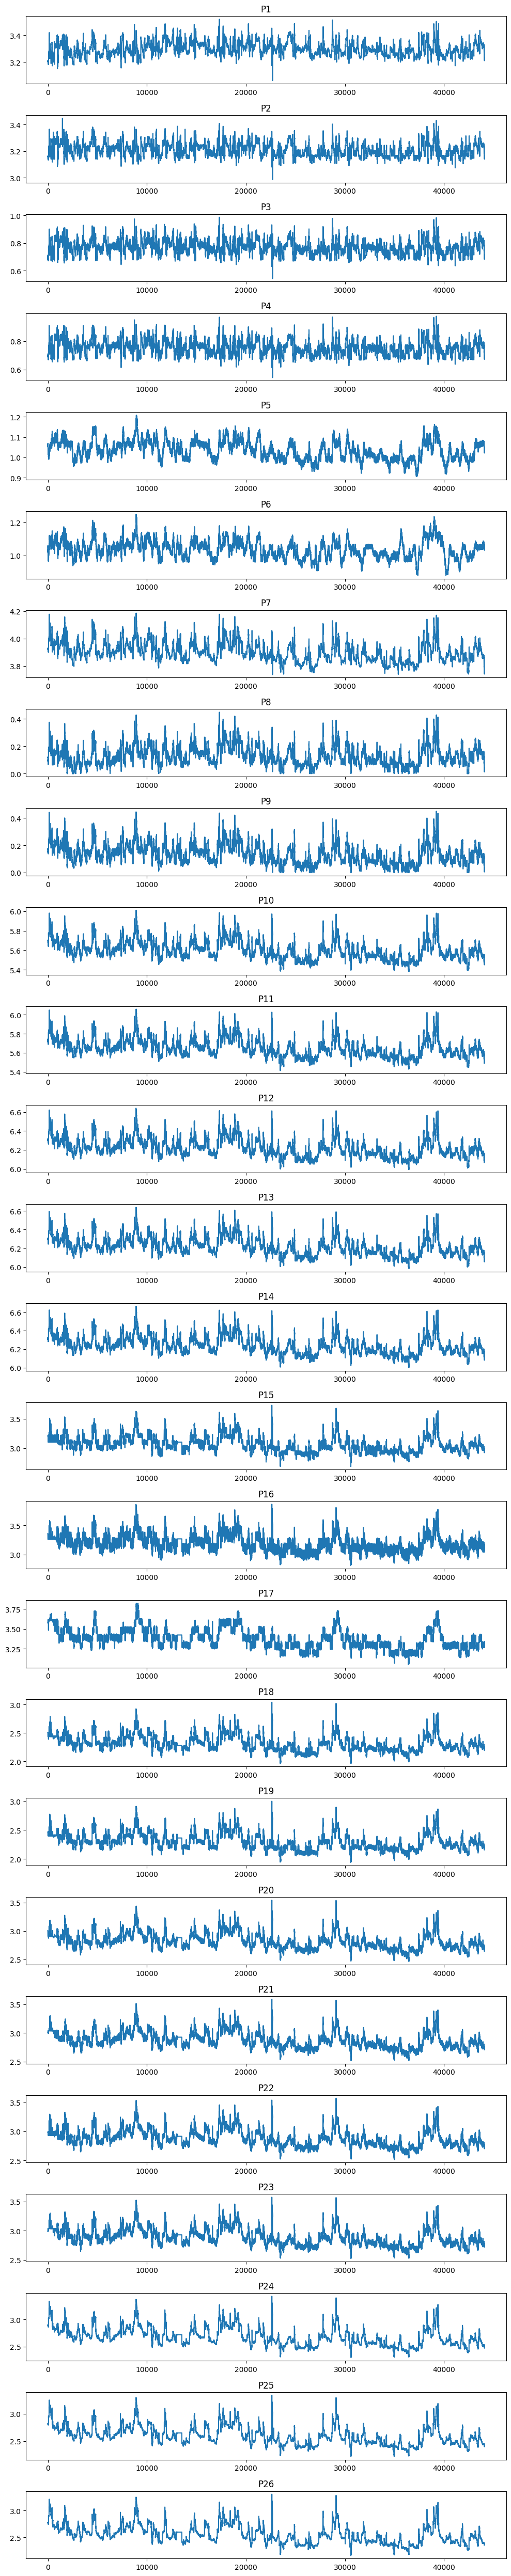

In [10]:
P = df_true.columns[[df_true.columns[i][0] == 'P' for i in range(len(df_true.columns))]]

fig, ax = plt.subplots(len(P),1,figsize=(10,50))
df_Ap= df_A[P]
for i in range(len(P)):
    ax[i].plot(df_Ap[f'P{i+1}'])
    ax[i].set_title(P[i])

plt.tight_layout()
plt.show()
#밸브 개도율 압력계: p7,p10,p11,p13,p14,p15,p16,p18,p19,p20,p21,p22,p23
#p17은 독립적

## 이상치 시각화

- P 데이터는 이상치 여부를 판단하는 아주 중요한 변수로 보인다.
- TEST SET에서도 P의 개수에 따라 제출해야하는 이상치 개수가 달라진다. 예를 들어 TEST-C0000이 P가 10개면, 10개에 대한 이상치 탐지 여부를 제출해야한다는 의미이다.

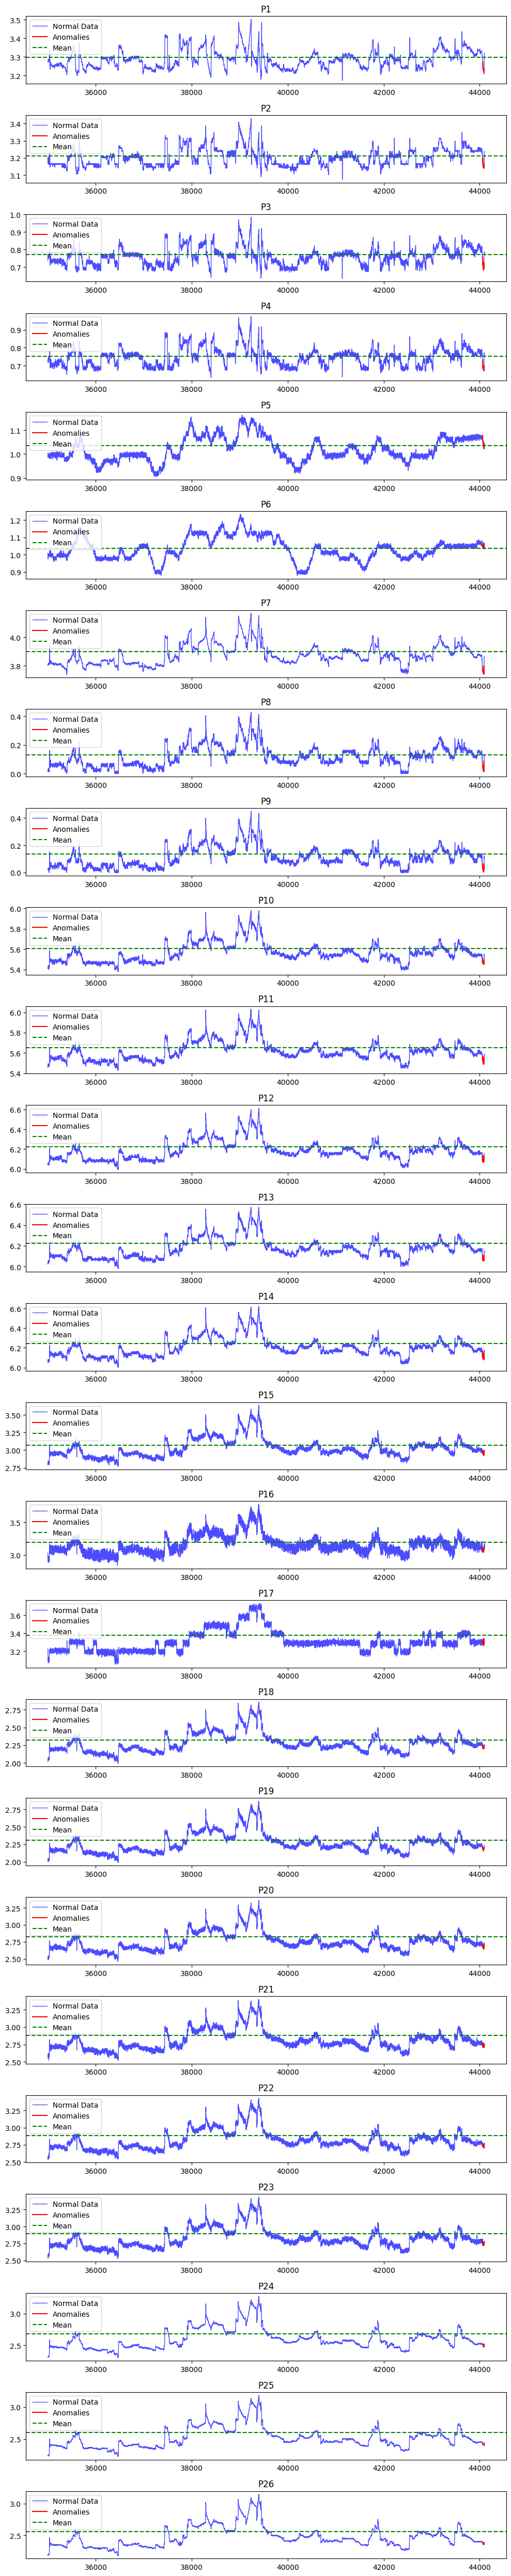

In [67]:
# P로 시작하는 컬럼 선택
P = df_true.columns[[df_true.columns[i][0] == 'P' for i in range(len(df_true.columns))]]
df_Ap = df_A[P]  # P로 시작하는 열만 선택

# 플롯 생성
fig, ax = plt.subplots(len(P), 1, figsize=(10, 50))

for i in range(len(P)):
    # 정상 데이터 플롯
    ax[i].plot(
        df_A.index[35000:45000],  # 시간 축
        df_Ap[P[i]][35000:45000],  # P 데이터
        label="Normal Data",
        color="blue",
        linewidth=1,
        alpha=0.7
    )

    # 이상치 데이터 플롯
    ax[i].plot(
        df_A.index[df_A["anomaly"] == 1],  # 이상치 시간
        df_Ap[P[i]][df_A["anomaly"] == 1],  # 이상치 값
        label="Anomalies",
        color="red",
        linewidth=1.5  # 두께 강조
    )

    # 평균선 추가
    mean_value = df_Ap[P[i]].mean()  # 평균값 계산
    ax[i].axhline(mean_value, color="green", linestyle="--", label="Mean")  # 수평선 추가

    # 제목 및 범례 추가
    ax[i].set_title(P[i])
    ax[i].legend()

plt.tight_layout()  # 레이아웃 조정
plt.show()


In [12]:
import pandas as pd

# anomaly == 1인 데이터에서 timestamp 열만 선택
timestamps = df_A[df_A["anomaly"] == 1]["timestamp"]

# DataFrame으로 변환 (엑셀 저장을 위해)
timestamps_df = timestamps.reset_index(drop=True).to_frame(name="timestamp")

# 엑셀 파일로 저장
timestamps_df.to_excel("timestamps.xlsx", index=False)

print("timestamp 데이터가 'timestamps.xlsx' 파일로 저장되었습니다.")

timestamp 데이터가 'timestamps.xlsx' 파일로 저장되었습니다.


In [13]:
timestamps_df

timestamp
0   24/06/26 14:21
1   24/06/26 14:22
2   24/06/26 14:23
3   24/06/26 14:24
4   24/06/26 14:25
5   24/06/26 14:26
6   24/06/26 14:27
7   24/06/26 14:28
8   24/06/26 14:29
9   24/06/26 14:30
10  24/06/26 14:31
11  24/06/26 14:32
12  24/06/26 14:33
13  24/06/26 14:34
14  24/06/26 14:35
15  24/06/26 14:36
16  24/06/26 14:37
17  24/06/26 14:38
18  24/06/26 14:39
19  24/06/26 14:40
20  24/06/26 14:41
21  24/06/26 14:42
22  24/06/26 14:43
23  24/06/26 14:44
24  24/06/26 14:45
25  24/06/26 14:46
26  24/06/26 14:47
27  24/06/26 14:48
28  24/06/26 14:49
29  24/06/26 14:50

In [14]:
df_A[df_A["anomaly"] == 1]

timestamp     Q1         Q2         Q3    Q4     Q5  M1  M2  M3  \
44061  24/06/26 14:21  18490  33011.001  41933.003  7424  94856   0   0   0   
44062  24/06/26 14:22  18010  33131.001  42305.000  7720  94856   0   0   0   
44063  24/06/26 14:23  18010  33131.001  42305.000  7720  94447   0   0   0   
44064  24/06/26 14:24  18410  32854.001  41058.003  7752  94447   0   0   0   
44065  24/06/26 14:25  17640  33086.001  41443.003  7711  94802   0   0   0   
44066  24/06/26 14:26  18100  33428.000  41121.001  7544  94802   0   0   0   
44067  24/06/26 14:27  18100  33428.000  41121.001  7544  94577   0   0   0   
44068  24/06/26 14:28  18180  33322.000  41728.999  7517  94484   0   0   0   
44069  24/06/26 14:29  17610  33248.000  42721.001  7504  94473   0   0   0   
44070  24/06/26 14:30  17610  33248.000  42721.001  7504  94672   0   0   0   
44071  24/06/26 14:31  18210  33078.000  41187.002  7453  94672   0   0   0   
44072  24/06/26 14:32  18110  33461.001  42133.999  7452  94427   0   0   0   
44073  24/06/26 14:33  17990  33068.000  42637.002  7568  94427   0   0   0   
44074  24/06/26 14:34  17990  33068.000  42637.002  7568  94233   0   0   0   
44075  24/06/26 14:35  17960  32995.000  41516.001  7461  95772   0   0   0   
44076  24/06/26 14:36  18430  32996.001  42665.000  7544  95772   0   0   0   
44077  24/06/26 14:37  18430  32996.001  42665.000  7544  93270   0   0   0   
44078  24/06/26 14:38  18140  33350.000  41980.000  7339  93270   0   0   0   
44079  24/06/26 14:39  18110  32992.000  42345.000  7477  94807   0   0   0   
44080  24/06/26 14:40  17740  33151.001  41912.002  7416  94807   0   0   0   
44081  24/06/26 14:41  17740  33151.001  41912.002  7416  95131   0   0   0   
44082  24/06/26 14:42  17670  33134.001  41073.999  7417  95046   0   0   0   
44083  24/06/26 14:43  18080  33447.000  42921.001  7639  94933   0   0   0   
44084  24/06/26 14:44  18080  33447.000  42921.001  7639  94904   0   0   0   
44085  24/06/26 14:45  17970  32878.000  40915.000  7617  94904   0   0   0   
44086  24/06/26 14:46  17880  33070.000  41762.002  7687  95209   0   0   0   
44087  24/06/26 14:47  17880  33070.000  41762.002  7687  95209   0   0   0   
44088  24/06/26 14:48  18280  32784.001  42356.001  7697  95535   0   0   0   
44089  24/06/26 14:49  17840  33169.001  41375.000  7683  94693   0   0   0   
44090  24/06/26 14:50  17880  33019.001  41798.999  6920  94693   0   0   0   

       M4  ...  P17_flag  P18_flag  P19_flag  P20_flag  P21_flag  P22_flag  \
44061   1  ...         0         0         0         0         0         0   
44062   1  ...         0         0         0         0         0         0   
44063   1  ...         0         0         0         0         0         0   
44064   1  ...         0         0         0         0         0         0   
44065   1  ...         0         0         0         0         0         0   
44066   1  ...         0         0         0         0         0         0   
44067   1  ...         0         0         0         0         0         0   
44068   1  ...         0         0         0         0         0         0   
44069   1  ...         0         0         0         0         0         0   
44070   1  ...         0         0         0         0         0         0   
44071   1  ...         0         0         0         0         0         0   
44072   1  ...         0         0         0         0         0         0   
44073   1  ...         0         0         0         0         0         0   
44074   1  ...         0         0         0         0         0         0   
44075   1  ...         0         0         0         0         0         0   
44076   1  ...         0         0         0         0         0         0   
44077   1  ...         0         0         0         0         0         0   
44078   1  ...         0         0         0         0         0         0   
44079   1  ...         0         0         0         0         0         0   
44

In [15]:
#시계열 자료로 변환
df_A['timestamp'] = pd.to_datetime(df_A['timestamp'], format='%y/%m/%d %H:%M')

In [16]:
df_A['timestamp'].head()

0   2024-05-27 00:00:00
1   2024-05-27 00:01:00
2   2024-05-27 00:02:00
3   2024-05-27 00:03:00
4   2024-05-27 00:04:00
Name: timestamp, dtype: datetime64[ns]

In [17]:
# anomaly가 1인 시간대 찾기
anomaly_times = df_A[df_A['anomaly'] == 1]['timestamp']

In [18]:
print(df_A['timestamp'].min(), df_A['timestamp'].max())

2024-05-27 00:00:00 2024-06-26 15:00:00


In [19]:
# anomaly가 1인 연속된 구간 찾기
anomaly_start = df_A[df_A['anomaly'] == 1]['timestamp'].min()
anomaly_end = df_A[df_A['anomaly'] == 1]['timestamp'].max()

In [20]:
anomaly_start

Timestamp('2024-06-26 14:21:00')

In [21]:
anomaly_end

Timestamp('2024-06-26 14:50:00')

In [22]:
# 데이터 추출
filtered_data = df_A[df_A["anomaly"] == 1]

In [23]:
filtered_data

timestamp     Q1         Q2         Q3    Q4     Q5  M1  M2  \
44061 2024-06-26 14:21:00  18490  33011.001  41933.003  7424  94856   0   0   
44062 2024-06-26 14:22:00  18010  33131.001  42305.000  7720  94856   0   0   
44063 2024-06-26 14:23:00  18010  33131.001  42305.000  7720  94447   0   0   
44064 2024-06-26 14:24:00  18410  32854.001  41058.003  7752  94447   0   0   
44065 2024-06-26 14:25:00  17640  33086.001  41443.003  7711  94802   0   0   
44066 2024-06-26 14:26:00  18100  33428.000  41121.001  7544  94802   0   0   
44067 2024-06-26 14:27:00  18100  33428.000  41121.001  7544  94577   0   0   
44068 2024-06-26 14:28:00  18180  33322.000  41728.999  7517  94484   0   0   
44069 2024-06-26 14:29:00  17610  33248.000  42721.001  7504  94473   0   0   
44070 2024-06-26 14:30:00  17610  33248.000  42721.001  7504  94672   0   0   
44071 2024-06-26 14:31:00  18210  33078.000  41187.002  7453  94672   0   0   
44072 2024-06-26 14:32:00  18110  33461.001  42133.999  7452  94427   0   0   
44073 2024-06-26 14:33:00  17990  33068.000  42637.002  7568  94427   0   0   
44074 2024-06-26 14:34:00  17990  33068.000  42637.002  7568  94233   0   0   
44075 2024-06-26 14:35:00  17960  32995.000  41516.001  7461  95772   0   0   
44076 2024-06-26 14:36:00  18430  32996.001  42665.000  7544  95772   0   0   
44077 2024-06-26 14:37:00  18430  32996.001  42665.000  7544  93270   0   0   
44078 2024-06-26 14:38:00  18140  33350.000  41980.000  7339  93270   0   0   
44079 2024-06-26 14:39:00  18110  32992.000  42345.000  7477  94807   0   0   
44080 2024-06-26 14:40:00  17740  33151.001  41912.002  7416  94807   0   0   
44081 2024-06-26 14:41:00  17740  33151.001  41912.002  7416  95131   0   0   
44082 2024-06-26 14:42:00  17670  33134.001  41073.999  7417  95046   0   0   
44083 2024-06-26 14:43:00  18080  33447.000  42921.001  7639  94933   0   0   
44084 2024-06-26 14:44:00  18080  33447.000  42921.001  7639  94904   0   0   
44085 2024-06-26 14:45:00  17970  32878.000  40915.000  7617  94904   0   0   
44086 2024-06-26 14:46:00  17880  33070.000  41762.002  7687  95209   0   0   
44087 2024-06-26 14:47:00  17880  33070.000  41762.002  7687  95209   0   0   
44088 2024-06-26 14:48:00  18280  32784.001  42356.001  7697  95535   0   0   
44089 2024-06-26 14:49:00  17840  33169.001  41375.000  7683  94693   0   0   
44090 2024-06-26 14:50:00  17880  33019.001  41798.999  6920  94693   0   0   

       M3  M4  ...  P17_flag  P18_flag  P19_flag  P20_flag  P21_flag  \
44061   0   1  ...         0         0         0         0         0   
44062   0   1  ...         0         0         0         0         0   
44063   0   1  ...         0         0         0         0         0   
44064   0   1  ...         0         0         0         0         0   
44065   0   1  ...         0         0         0         0         0   
44066   0   1  ...         0         0         0         0         0   
44067   0   1  ...         0         0         0         0         0   
44068   0   1  ...         0         0         0         0         0   
44069   0   1  ...         0         0         0         0         0   
44070   0   1  ...         0         0         0         0         0   
44071   0   1  ...         0         0         0         0         0   
44072   0   1  ...         0         0         0         0         0   
44073   0   1  ...         0         0         0         0         0   
44074   0   1  ...         0         0         0         0         0   
44075   0   1  ...         0         0         0         0         0   
44076   0   1  ...         0         0         0         0         0   
44077   0   1  ...         0         0         0         0         0   
44078   0   1  ...         0         0         0         0         0   
44079   0   1  ...         0         0         0         0         0   
44080   0   1  ...         0         0         0         0         0   
44081   0   1  ...         0         0         0      

In [24]:
filtered_data.head()

timestamp     Q1         Q2         Q3    Q4     Q5  M1  M2  \
44061 2024-06-26 14:21:00  18490  33011.001  41933.003  7424  94856   0   0   
44062 2024-06-26 14:22:00  18010  33131.001  42305.000  7720  94856   0   0   
44063 2024-06-26 14:23:00  18010  33131.001  42305.000  7720  94447   0   0   
44064 2024-06-26 14:24:00  18410  32854.001  41058.003  7752  94447   0   0   
44065 2024-06-26 14:25:00  17640  33086.001  41443.003  7711  94802   0   0   

       M3  M4  ...  P17_flag  P18_flag  P19_flag  P20_flag  P21_flag  \
44061   0   1  ...         0         0         0         0         0   
44062   0   1  ...         0         0         0         0         0   
44063   0   1  ...         0         0         0         0         0   
44064   0   1  ...         0         0         0         0         0   
44065   0   1  ...         0         0         0         0         0   

       P22_flag  P23_flag  P24_flag  P25_flag  P26_flag  
44061         0         0         0         0         0  
44062         0         0         0         0         0  
44063         0         0         0         0         0  
44064         0         0         0         0         0  
44065         0         0         0         0         0  

[5 rows x 73 columns]

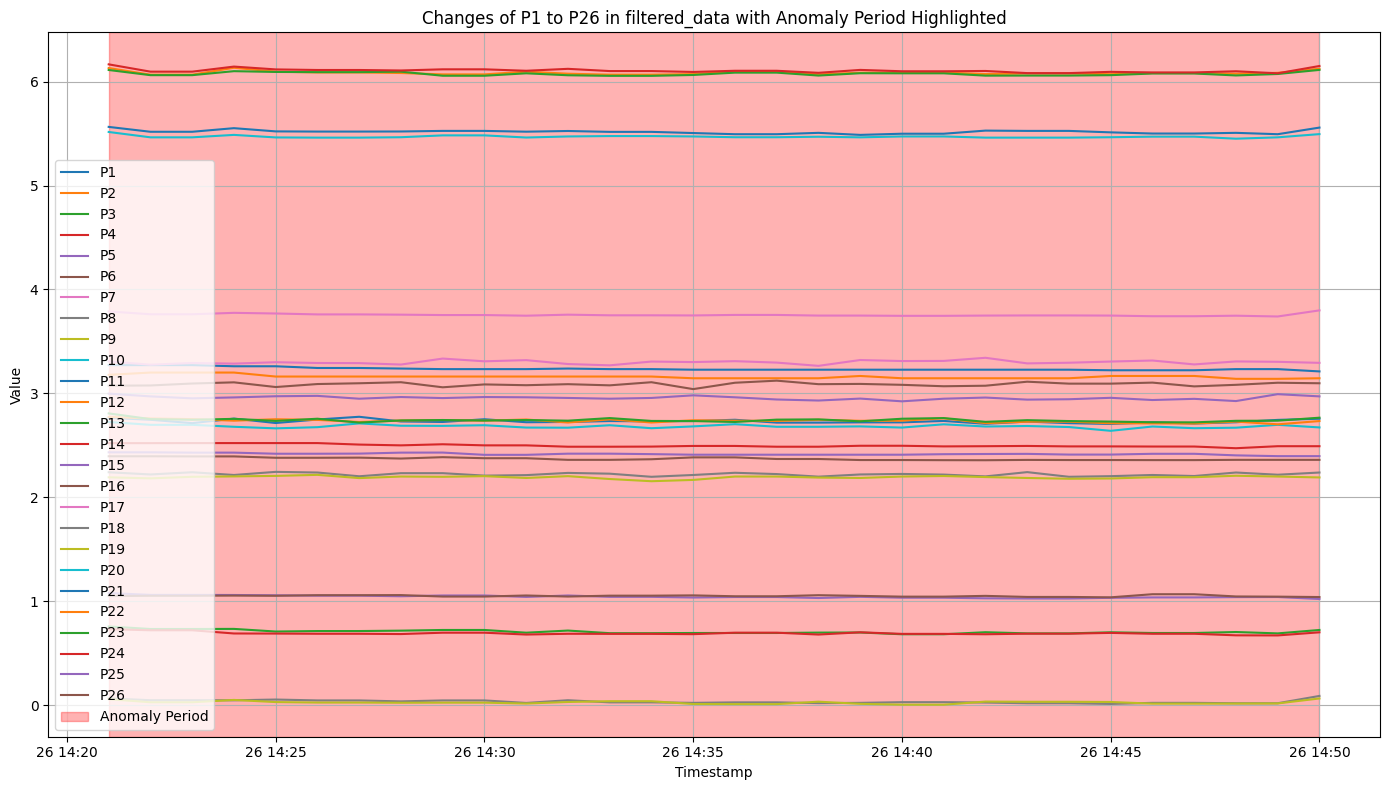

In [25]:
# p1부터 p10까지의 데이터 시각화
plt.figure(figsize=(14, 8))
for i in range(1, 27):
    plt.plot(filtered_data['timestamp'], filtered_data[f'P{i}'], label=f'P{i}')

# anomaly 구간 강조
plt.axvspan(anomaly_start, anomaly_end, color='red', alpha=0.3, label='Anomaly Period')

plt.title('Changes of P1 to P26 in filtered_data with Anomaly Period Highlighted')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


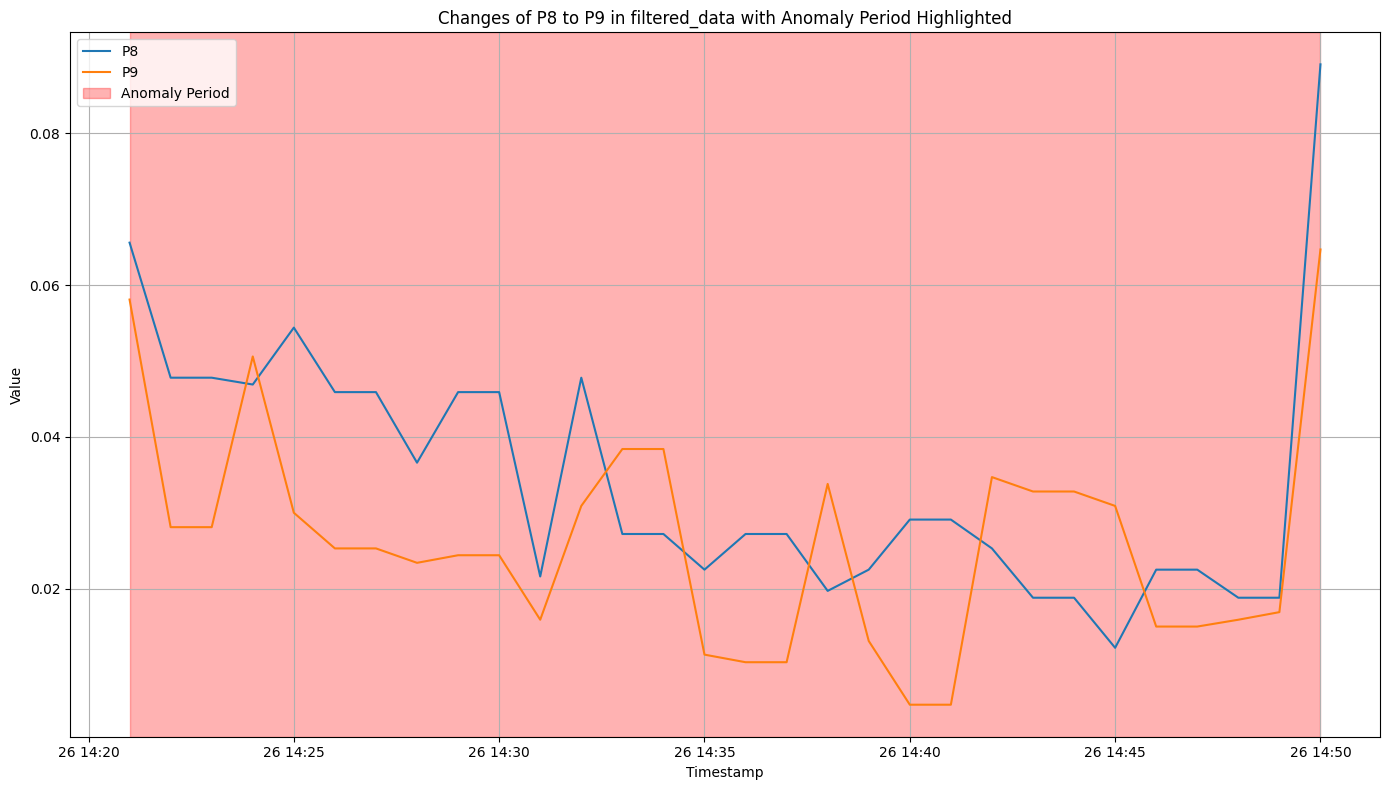

In [26]:
# p1부터 p10까지의 데이터 시각화
plt.figure(figsize=(14, 8))
for i in range(8, 10):
    plt.plot(filtered_data['timestamp'], filtered_data[f'P{i}'], label=f'P{i}')

# anomaly 구간 강조
plt.axvspan(anomaly_start, anomaly_end, color='red', alpha=0.3, label='Anomaly Period')

plt.title('Changes of P8 to P9 in filtered_data with Anomaly Period Highlighted')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [27]:
# 숫자형 컬럼만 선택 (timestamp와 같은 비숫자형 컬럼 제외)
numeric_columns = filtered_data.select_dtypes(include=[np.number]).columns

In [28]:
# P8, P9를 포함한 모든 숫자형 컬럼 간의 상관관계 계산
correlation_matrix = filtered_data[numeric_columns].corr()

In [29]:
# P8, P9와 다른 컬럼들 간의 상관관계만 선택
p8_p9_correlations = correlation_matrix.loc[['P8', 'P9'], :]

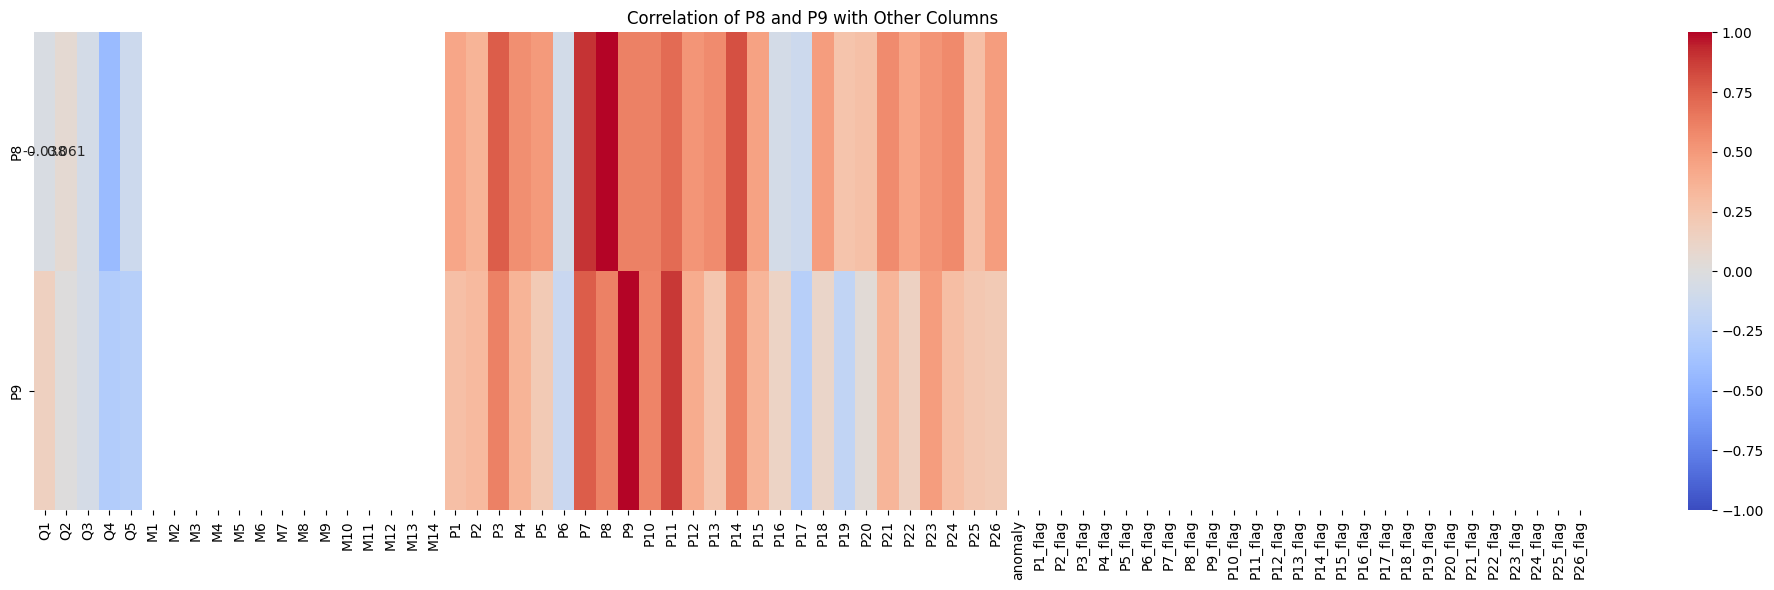

In [30]:
# 히트맵 생성
plt.figure(figsize=(20, 6))
sns.heatmap(p8_p9_correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation of P8 and P9 with Other Columns')
plt.tight_layout()
plt.show()

In [31]:
# P8, P9와 가장 상관관계가 높은 상위 5개 컬럼 출력
print("P8과 가장 상관관계가 높은 상위 10개 컬럼:")
print(correlation_matrix['P8'].sort_values(ascending=False)[1:11])  # P8 자신 제외

P8과 가장 상관관계가 높은 상위 10개 컬럼:
P7     0.902108
P14    0.807657
P3     0.758265
P11    0.710226
P10    0.612410
P9     0.610755
P24    0.573942
P13    0.564762
P21    0.564356
P4     0.553209
Name: P8, dtype: float64


In [32]:
# P8, P9와 가장 상관관계가 높은 상위 5개 컬럼 출력
print("P9와 가장 상관관계가 높은 상위 10개 컬럼:")
print(correlation_matrix['P9'].sort_values(ascending=False)[1:11])

P9와 가장 상관관계가 높은 상위 10개 컬럼:
P11    0.886487
P7     0.764961
P8     0.610755
P3     0.610242
P14    0.605744
P10    0.597846
P23    0.480104
P12    0.401636
P4     0.359354
P21    0.346872
Name: P9, dtype: float64


C:\Users\leonk\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


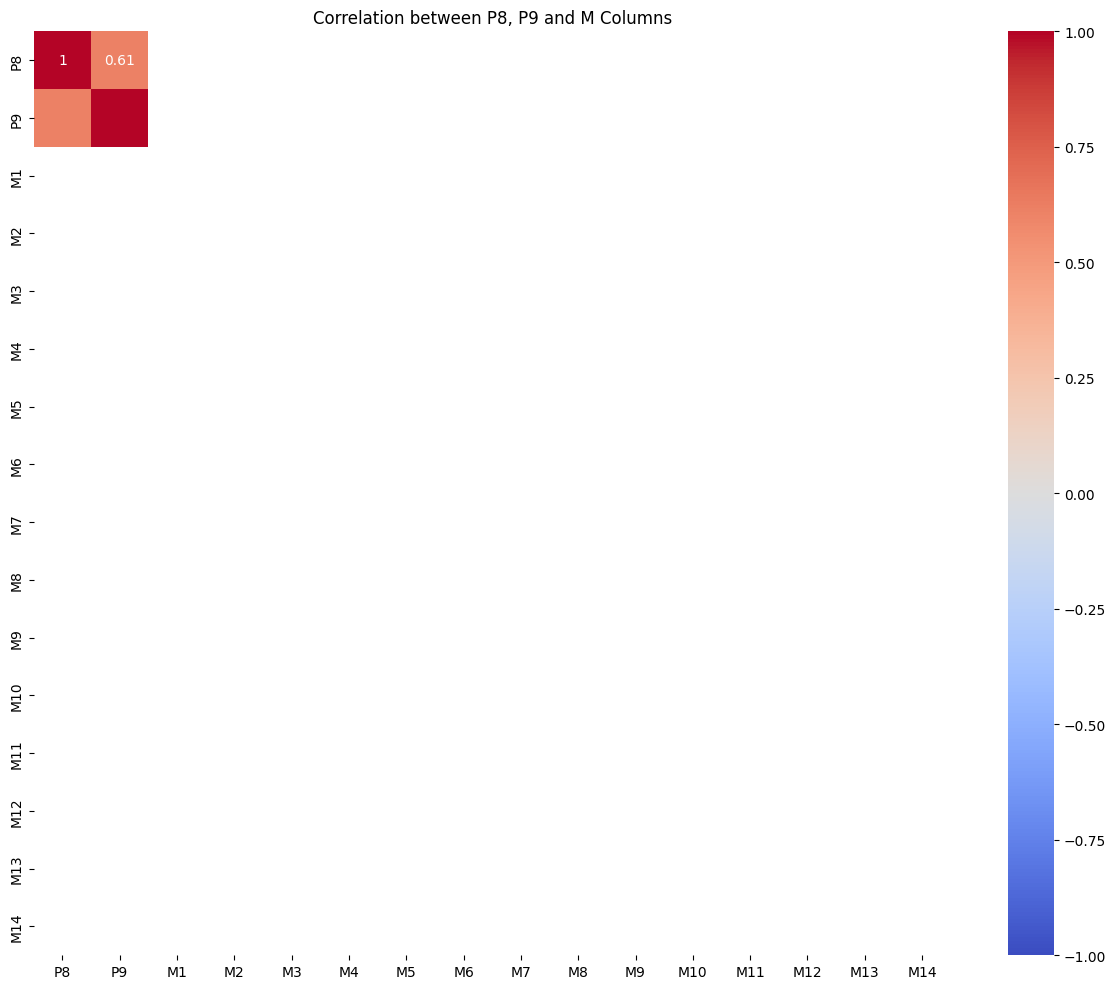

In [33]:
# M으로 시작하는 컬럼 선택
m_columns = [col for col in filtered_data.columns if col.startswith('M')]

# P8, P9와 M으로 시작하는 컬럼 간의 상관관계 계산
correlation_matrix_p_m = filtered_data[['P8', 'P9'] + m_columns].corr()

# 히트맵 생성
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_p_m, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation between P8, P9 and M Columns')
plt.tight_layout()
plt.show()


- Anomaly를 관측할 때 펌프와 압력사이의 상관관계가 0일수록 누수가 났을 가능성이 높다(가설)
- TrainB도 이 가설처럼 나오면 모델을 돌릴때 펌프의 역할은 거의 없을 수도 있다

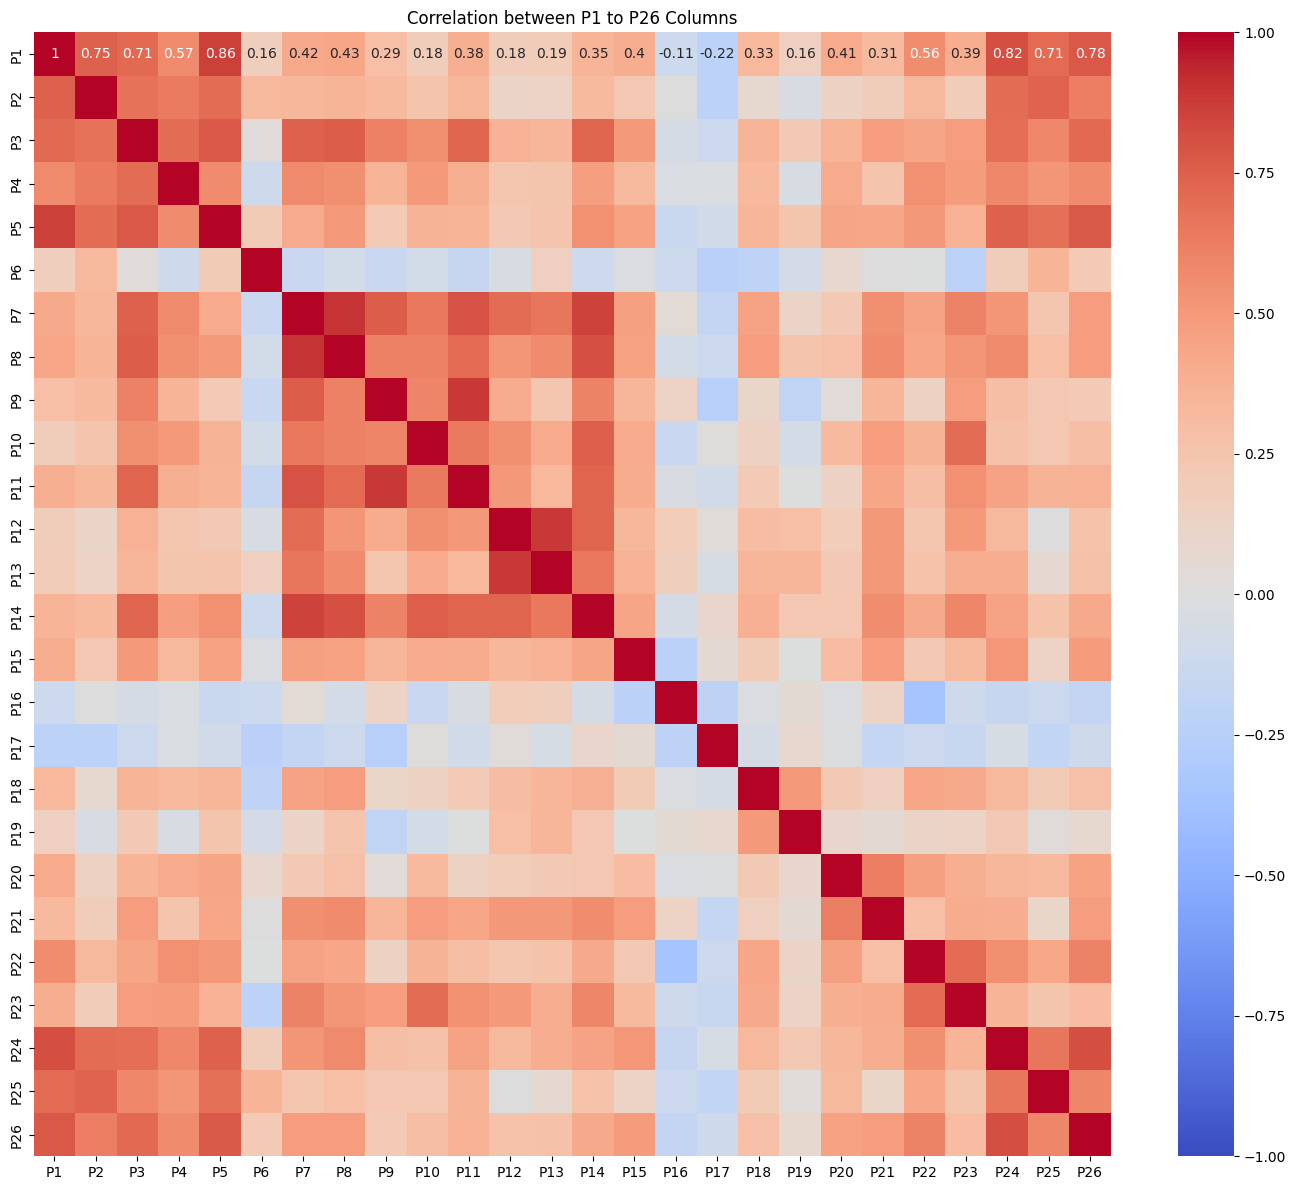

In [34]:
# P1부터 P26까지의 컬럼 선택
p_columns = [f'P{i}' for i in range(1, 27)]

# P1부터 P26까지의 상관관계 계산
correlation_matrix_p = filtered_data[p_columns].corr()

# 히트맵 생성
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix_p, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation between P1 to P26 Columns')
plt.tight_layout()
plt.show()
#p17은 고인물

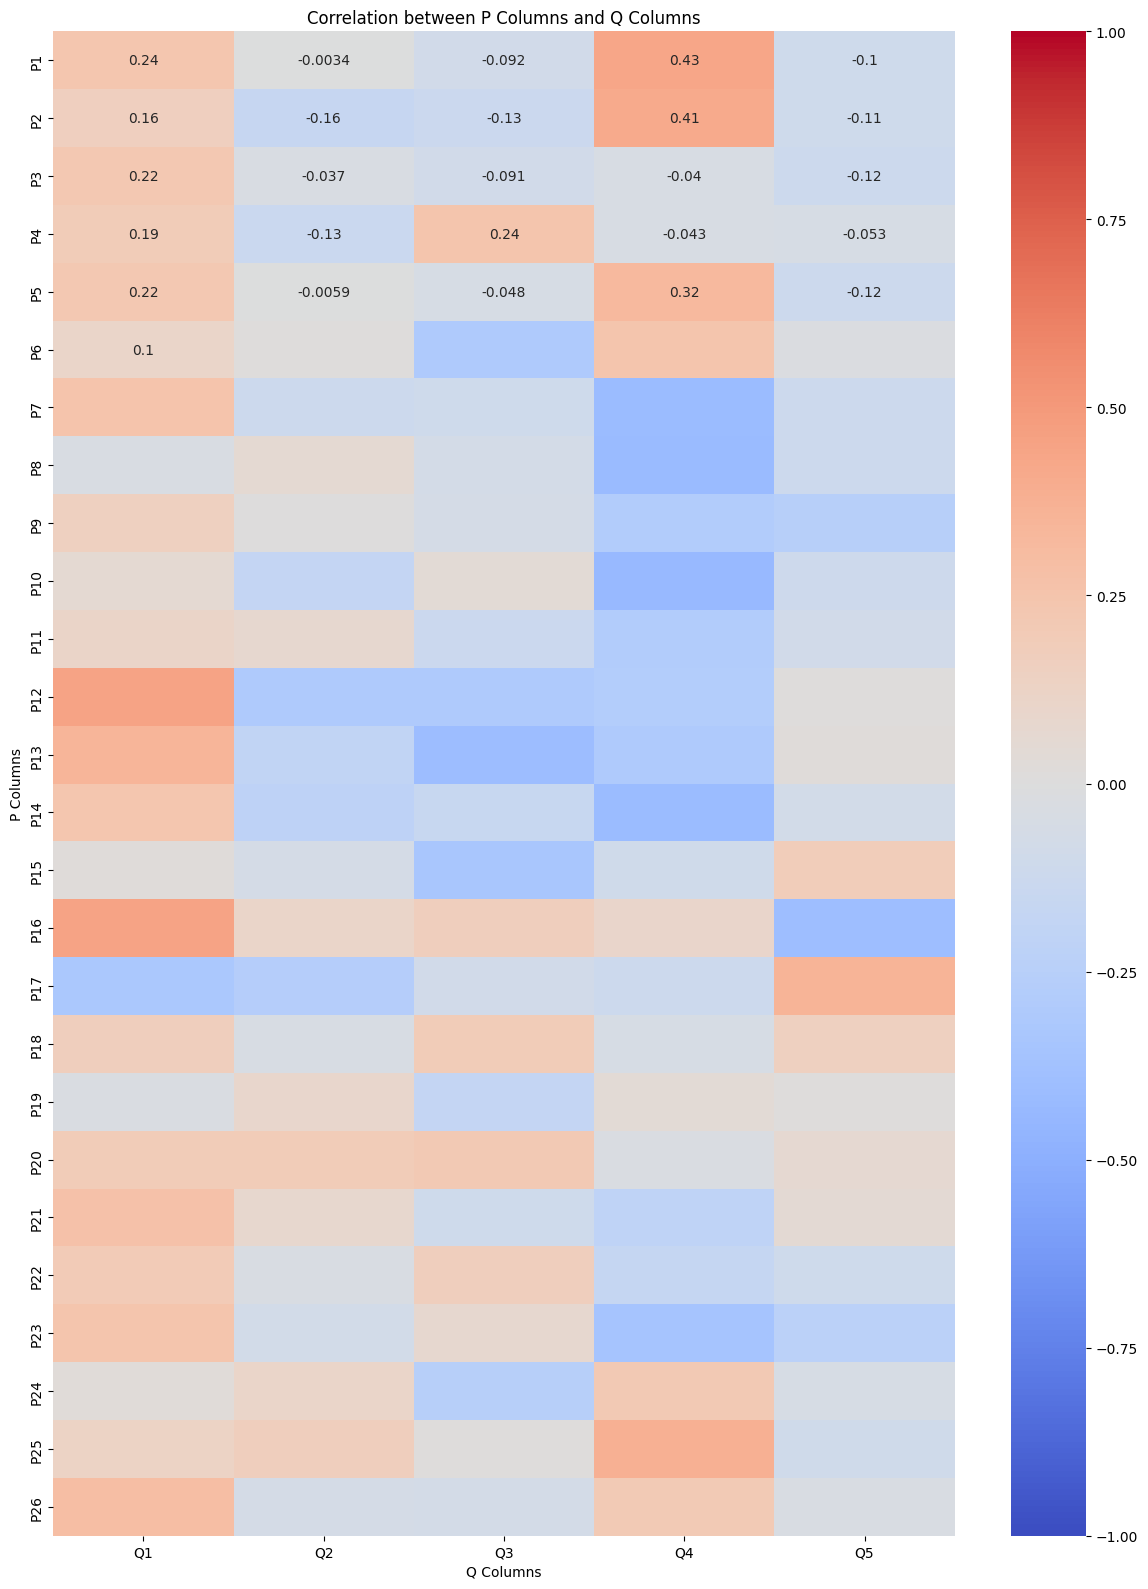

가장 높은 상관관계를 가진 P-Q 쌍 5개:
P16 - Q1: 0.4527
P12 - Q1: 0.4466
P10 - Q4: -0.4342
P1 - Q4: 0.4312
P8 - Q4: -0.4229


In [35]:
# P1부터 P26까지의 컬럼과 Q1부터 Q5까지의 컬럼 선택
p_columns = [f'P{i}' for i in range(1, 27)]
q_columns = [f'Q{i}' for i in range(1, 6)]

# P 컬럼들과 Q 컬럼들 간의 상관관계 계산
correlation_matrix_pq = filtered_data[p_columns + q_columns].corr().loc[p_columns, q_columns]

# 히트맵 생성
plt.figure(figsize=(12, 16))
sns.heatmap(correlation_matrix_pq, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation between P Columns and Q Columns')
plt.xlabel('Q Columns')
plt.ylabel('P Columns')
plt.tight_layout()
plt.show()

# 가장 높은 상관관계를 가진 P-Q 쌍 5개 출력
correlation_pairs = []
for p in p_columns:
    for q in q_columns:
        correlation_pairs.append((p, q, correlation_matrix_pq.loc[p, q]))

top_5_correlations = sorted(correlation_pairs, key=lambda x: abs(x[2]), reverse=True)[:5]

print("가장 높은 상관관계를 가진 P-Q 쌍 5개:")
for p, q, corr in top_5_correlations:
    print(f"{p} - {q}: {corr:.4f}")

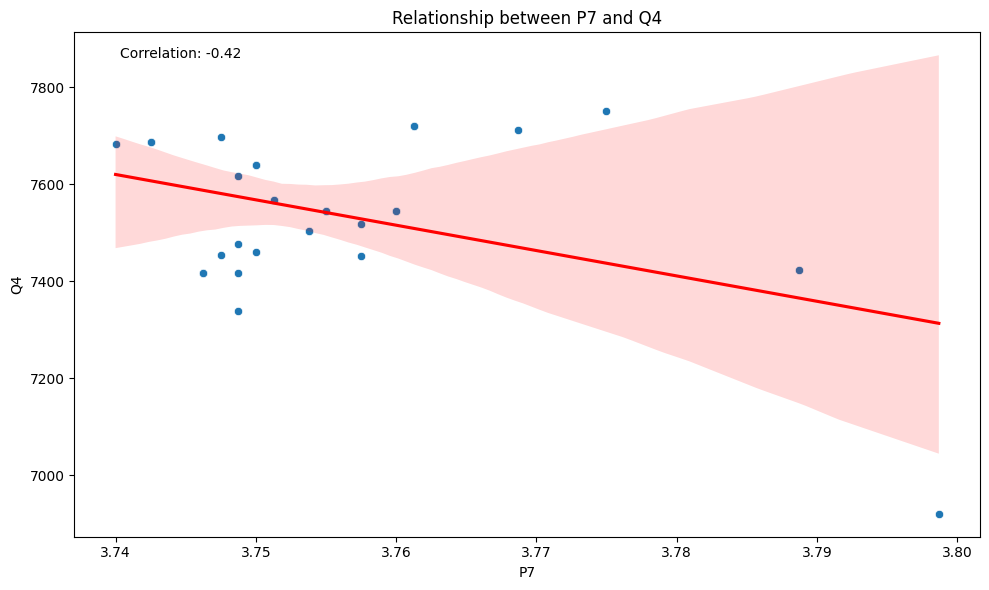

P7와 Q4의 상관계수: -0.4153

기술 통계:
              P7           Q4
count  30.000000    30.000000
mean    3.755537  7538.800000
std     0.012912   162.650758
min     3.740000  6920.000000
25%     3.748700  7455.000000
50%     3.751300  7544.000000
75%     3.759375  7672.000000
max     3.798700  7752.000000


In [36]:
# 산점도 생성
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='P7', y='Q4')

# 회귀선 추가
sns.regplot(data=filtered_data, x='P7', y='Q4', scatter=False, color='red')

# 그래프 제목과 축 레이블 설정
plt.title('Relationship between P7 and Q4')
plt.xlabel('P7')
plt.ylabel('Q4')

# 상관계수 계산 및 표시
correlation = filtered_data['P7'].corr(filtered_data['Q4'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

# 추가적인 통계 정보 출력
print(f"P7와 Q4의 상관계수: {correlation:.4f}")
print("\n기술 통계:")
print(filtered_data[['P7', 'Q4']].describe())

## 전체 데이터의 경우

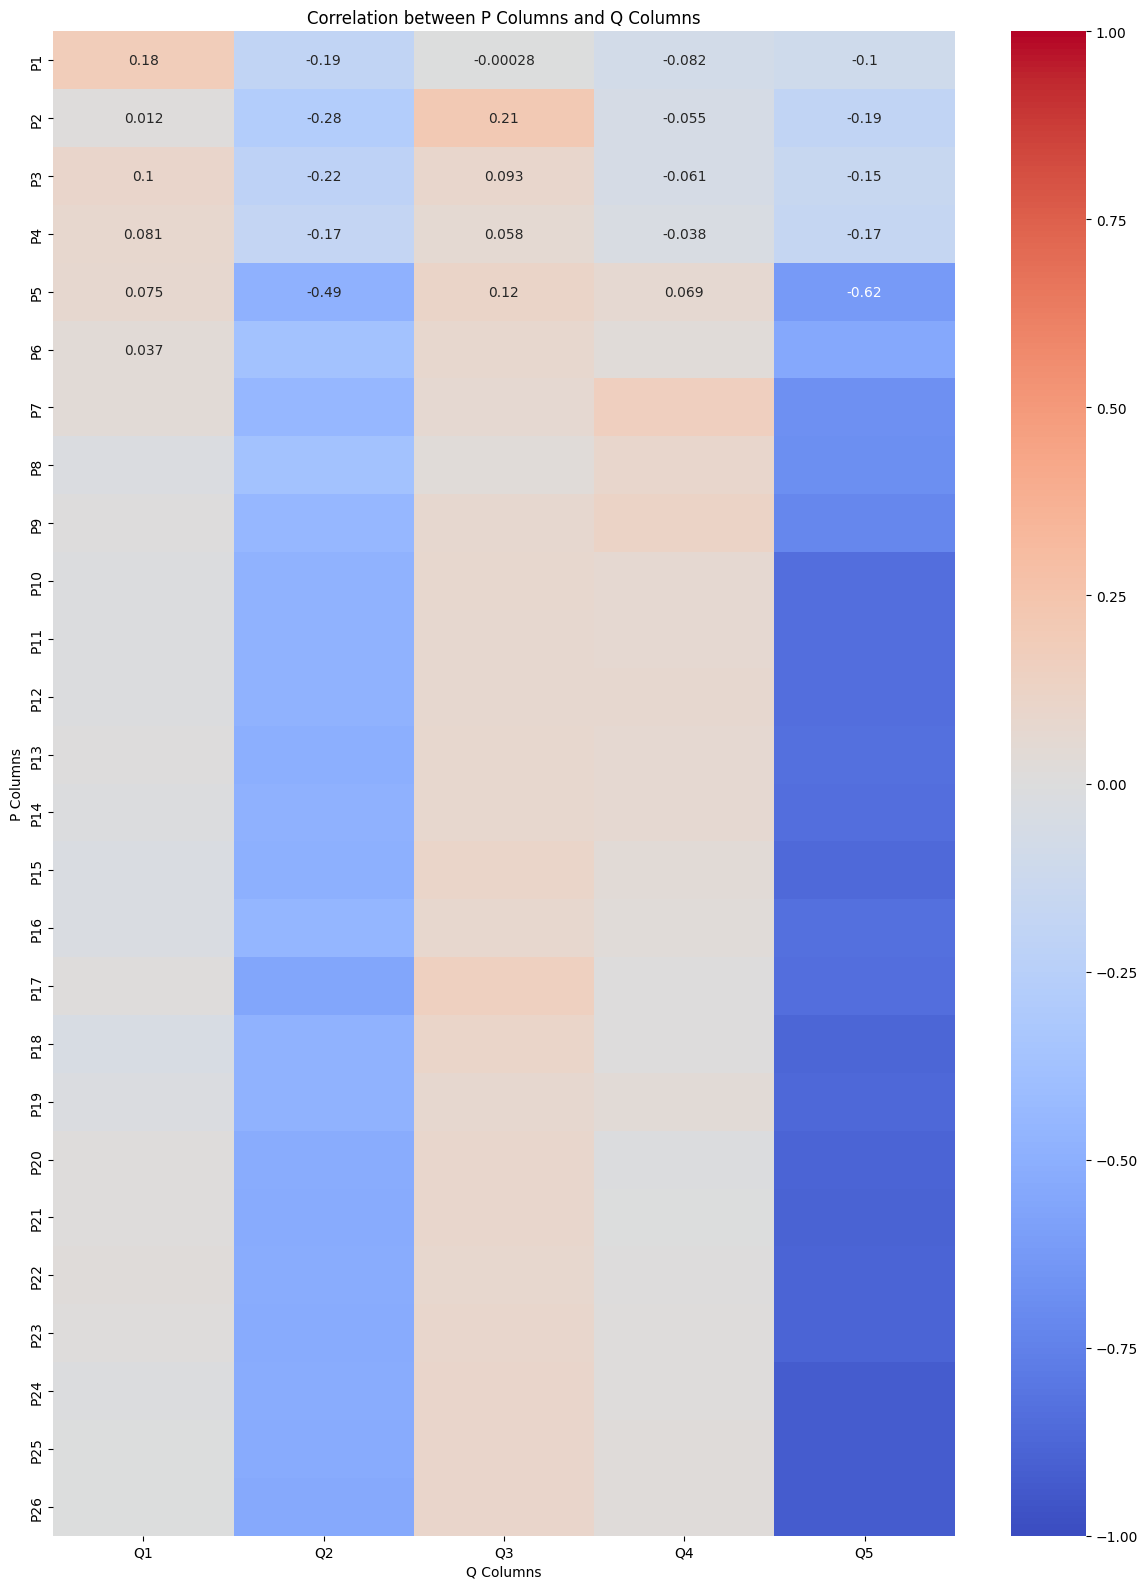

가장 높은 상관관계를 가진 P-Q 쌍 5개:
P24 - Q5: -0.9269
P26 - Q5: -0.9243
P25 - Q5: -0.9240
P21 - Q5: -0.8932
P23 - Q5: -0.8905


In [37]:
# P1부터 P26까지의 컬럼과 Q1부터 Q5까지의 컬럼 선택
p_columns = [f'P{i}' for i in range(1, 27)]
q_columns = [f'Q{i}' for i in range(1, 6)]

# P 컬럼들과 Q 컬럼들 간의 상관관계 계산
correlation_matrix_pq = df_A[p_columns + q_columns].corr().loc[p_columns, q_columns]

# 히트맵 생성
plt.figure(figsize=(12, 16))
sns.heatmap(correlation_matrix_pq, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation between P Columns and Q Columns')
plt.xlabel('Q Columns')
plt.ylabel('P Columns')
plt.tight_layout()
plt.show()

# 가장 높은 상관관계를 가진 P-Q 쌍 5개 출력
correlation_pairs = []
for p in p_columns:
    for q in q_columns:
        correlation_pairs.append((p, q, correlation_matrix_pq.loc[p, q]))

top_5_correlations = sorted(correlation_pairs, key=lambda x: abs(x[2]), reverse=True)[:5]

print("가장 높은 상관관계를 가진 P-Q 쌍 5개:")
for p, q, corr in top_5_correlations:
    print(f"{p} - {q}: {corr:.4f}")